In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [39]:
def corr_matrix(df, n_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(n_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize = (n_c/1.6, n_c/1.6))
    sns.set(font_scale = 1.25)
    sns.heatmap(cm, linewidths = 0.5, annot = True, square = True, 
                fmt = '.2f', annot_kws = {'size': 10}, 
                yticklabels = cols.values, xticklabels = cols.values,
                cmap = "PuRd"
               )
    plt.show()    

In [5]:
df_train = pd.read_csv('data/train.csv', index_col = 0)
df_test = pd.read_csv('data/test.csv', index_col = 0)

In [6]:
print(df_train.shape)
print('~'*100)
print(df_test.shape)

(1460, 80)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(1459, 79)


In [12]:
df_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,192000
670,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137500
136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
454,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,210000
718,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,157000


In [11]:
df_test.describe().transpose().head(5)

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,57.378341,42.746880,20.0,20.0,50.0,70.0,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.0,5.0,6.0,9.0


# The Target
## 'SalePrice' Log-Linear Transformation
A review of the distribution for 'SalePrice' reveals that the distribution does not appear to be Gaussian.  Skewness, Kurtosis, and the D'Agostino's K^2 test stat bear this out. I'm including it here for ease of exposition. 

In [13]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [14]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
target = 'SalePrice_Log'


In [15]:
features_num = df_train.dtypes[df_train.dtypes != "object"].index
print("Feature Space Numeric (FS-N): ", len(features_num))

features_cat = df_train.dtypes[df_train.dtypes == "object"].index
print("Feature Space Categorical (FS-C): ", len(features_cat))

Feature Space Numeric (FS-N):  38
Feature Space Categorical (FS-C):  43


In [16]:
print(df_train[features_num].columns)
print("~"*100)
print(df_train[features_cat].columns)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 

In [18]:
na_numb = df_train.isnull().sum().sort_values(ascending = False)
na_perc = (100*df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
na_tabl = pd.concat([na_numb,na_perc], axis = 1, keys = ['NA (#) ', 'NA (%)'])
na_tabl.head(5)

,NA (#),NA (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [19]:
# We review the data and see certain features include term 'NA'.  For such features, relable 'NA' as 'None'.
na_fill = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','Fence','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType','MiscFeature','PoolQC']
# replace 'NaN' with 'None' in these columns
for col in na_fill:
    df_train[col].fillna('None',inplace = True)
    df_test[col].fillna('None',inplace=True)

In [20]:
na_numb = df_train.isnull().sum().sort_values(ascending = False)
na_perc = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
na_tabl = pd.concat([na_numb,na_perc], axis = 1, keys = ['NA (#) ', 'NA (%)'])
na_tabl.head(5)

,NA (#),NA (%)
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtQual,0,0.000000
RoofMatl,0,0.000000


In [24]:
# Impute median for 'LotFrontage', 'GarageYrBlt'. and 'MasVnrArea'.
# Housekeeping Note:  Query: Perform before or after outliers are removed?  Use mean or median or mode?

df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)

In [25]:
na_numb = df_train.isnull().sum().sort_values(ascending = False)
na_perc = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
na_tabl = pd.concat([na_numb,na_perc], axis = 1, keys = ['NA (#) ', 'NA (%)'])
na_tabl.head(5)

,NA (#),NA (%)
SalePrice_Log,0,0.0
HeatingQC,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


# Exploratory Data Analysis

In [33]:
round(df_train[features_num].describe(),0)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,47.0,...,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0,12.0
std,42.0,22.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,161.0,...,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0,0.0
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0,10.0
25%,20.0,60.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0,12.0
50%,50.0,70.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0,12.0
75%,70.0,79.0,11602.0,7.0,6.0,2000.0,2004.0,164.0,712.0,0.0,...,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0,12.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0,14.0


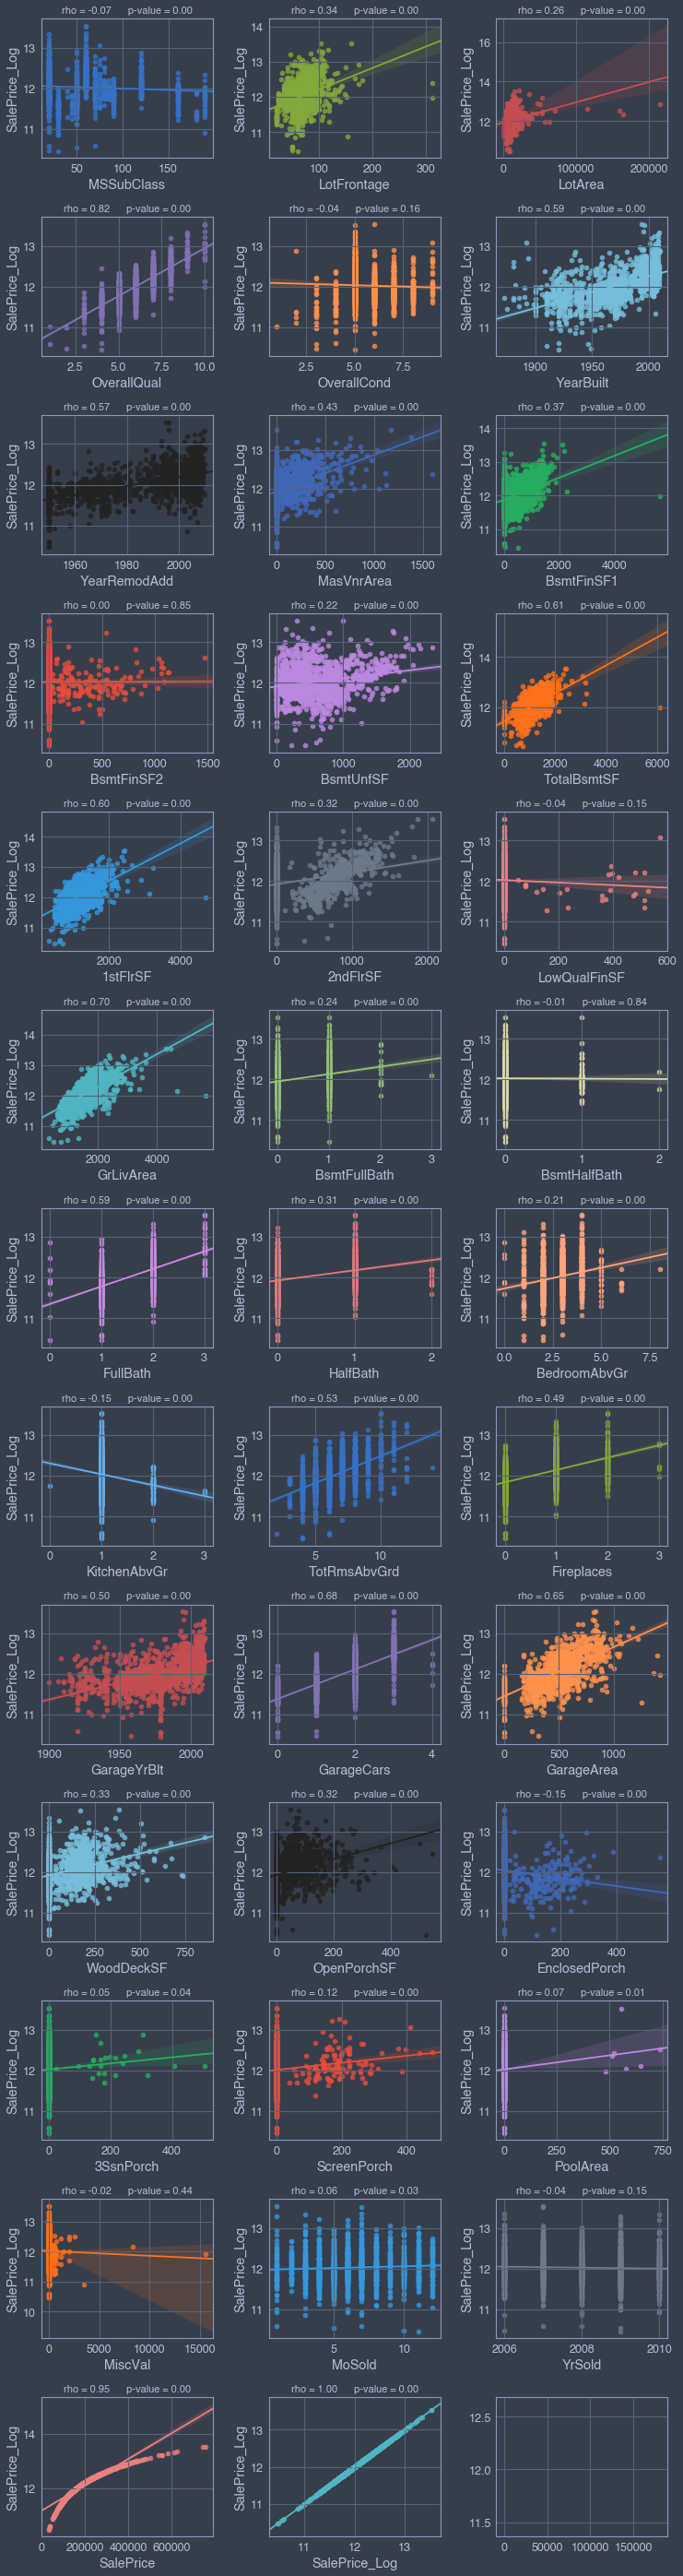

In [34]:
from scipy import stats

n_rows = 13
n_cols = 3
corr = [ ]
#target_ = 'SalePrice'
target_ = target 

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+c
        if i < len(list(features_num)):
            sns.regplot(df_train[features_num[i]], df_train[target_], ax = axs[r][c]) 
            stp = stats.pearsonr(df_train[features_num[i]], df_train[target_])
            str_title = "rho = " + "{0:.2f}".format(stp[0]) + "      " "p-value = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            corr.append(stp[0])
            
plt.tight_layout()    
plt.show()   


## Skewness & Kurtosis
### Visual Inspection & D'Agostino's K^2 Test
By visual inspection, it is clear that:
 Many features do not exhibit Gaussian characteristics. In order to further quantify this, we use D'Agostino's K^2 Test.
 #Housekeeping Note: Check D'Agostino's Stat. Showing all fail.











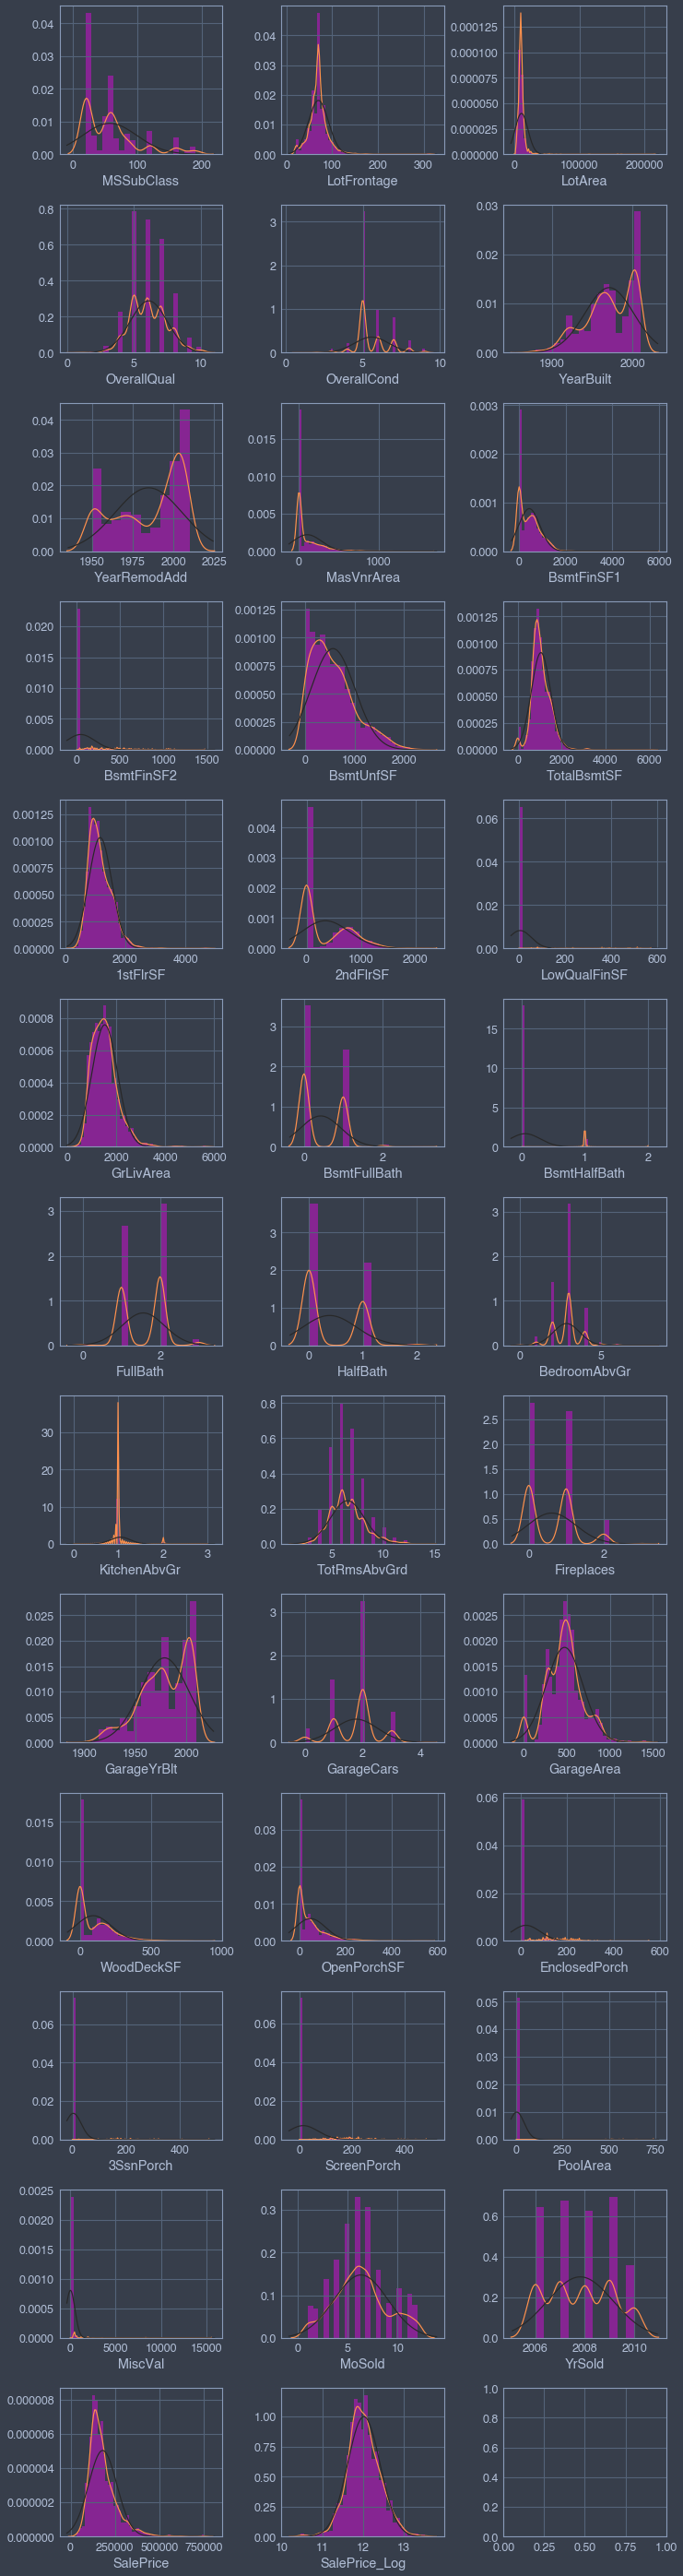

In [35]:
from scipy import stats
from scipy.stats import norm

n_rows = 13
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+c
        if i < len(list(features_num)):
            sns.distplot(df_train[features_num[i]], 
                         fit = norm, kde = True, 
                         ax = axs[r][c], 
                         color ='#ff00ff', 
                         kde_kws={"color":"y"})
            
plt.tight_layout()    
plt.show()   

In [38]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

stat_ = [ ]
p_ = [ ]
result_ = [ ]
skewness = [ ]
kurtosis = [ ] 
alpha = 1e-1

for _ in features_num:
    skewness.append(df_train[_].skew())
    kurtosis.append(df_train[_].kurt())
    
    stat, p = normaltest(df_train[_])
    stat_.append(stat)
    p_.append(p)
    if p > alpha:
        x = 'Gaussian; FTR(H0)'
        result_.append(x)
    else:
        x = '\Gaussian; Reject(H0)'
        result_.append(x)

stats_sk = pd.concat([pd.Series(df_train[features_num].columns),pd.Series(corr),pd.Series(skewness),pd.Series(kurtosis),pd.Series(stat_),pd.Series(p_),pd.Series(result_)], axis = 1, keys = ['Feature','Correlation to Target','Skew', 'Kurtosis',"K^2",'p-value','Result'])
round(stats_sk.head(6),3)

,Feature,Correlation to Target,Skew,Kurtosis,K^2,p-value,Result
0,MSSubClass,-0.074,1.408,1.580,337.187,0.000,\Gaussian; Reject(H0)
1,LotFrontage,0.336,2.385,21.848,915.551,0.000,\Gaussian; Reject(H0)
2,LotArea,0.257,12.208,203.243,2590.592,0.000,\Gaussian; Reject(H0)
3,OverallQual,0.817,0.217,0.096,11.905,0.003,\Gaussian; Reject(H0)
4,OverallCond,-0.037,0.693,1.106,131.292,0.000,\Gaussian; Reject(H0)
5,YearBuilt,0.587,-0.613,-0.440,98.332,0.000,\Gaussian; Reject(H0)


# Categorical Variables

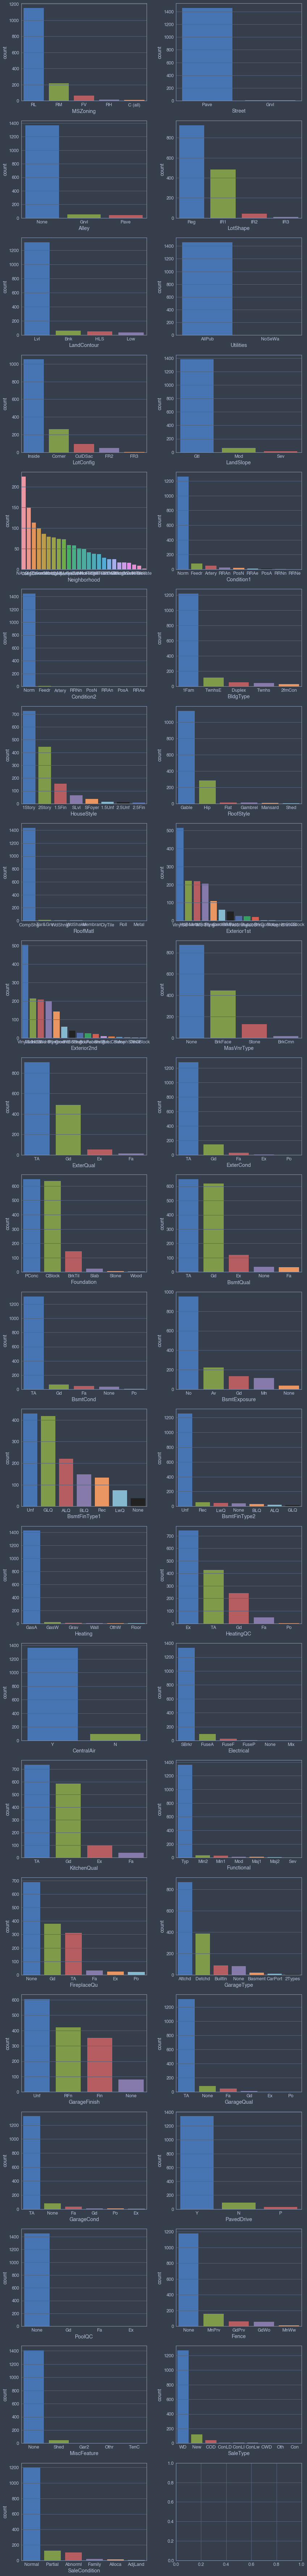

In [40]:
n_rows = 22
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4*1.5,n_rows*3*1.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+c
        if i < len(list(features_cat)):
            sns.countplot(df_train[features_cat[i]], 
                          order=df_train[features_cat[i]].value_counts().index,
                          #palette = 'Blues', 
                          ax = axs[r][c])
            
plt.tight_layout()    
plt.show()   



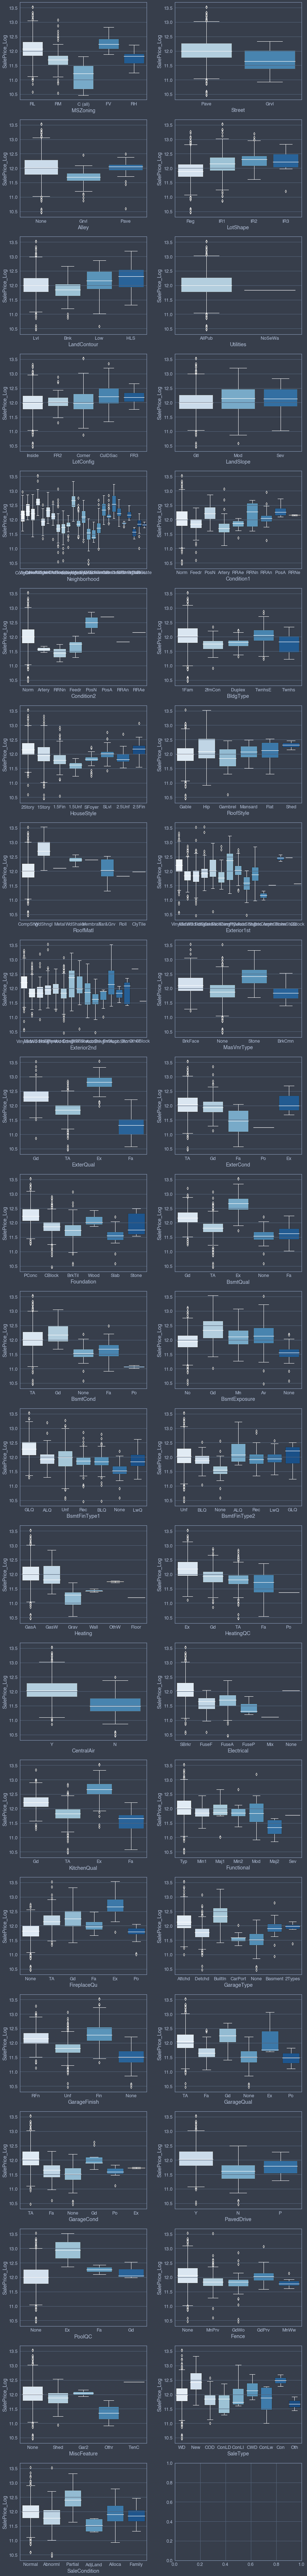

In [41]:
n_rows = 22
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4*1.5,n_rows*3*1.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+c
        if i < len(list(features_cat)):
                    sns.boxplot(data = df_train, 
                            x = features_cat[i], 
                            y = target_,
                            palette = 'Blues',
                            boxprops = dict(linewidth=1),
                            medianprops = dict(color = 'white'),
                            whiskerprops = dict(color='white',linewidth=1.0),capprops=dict(color='white',linewidth=1.0),
                            flierprops = dict(color = 'white', markeredgecolor = 'white'),
                            ax = axs[r][c])
                
         
plt.tight_layout()  
plt.show()   

In [42]:

features_num = df_train.dtypes[df_train.dtypes != "object"].index
print("Feature Space Numeric (FS-N): ", len(features_num))

features_cat = df_train.dtypes[df_train.dtypes == "object"].index
print("Feature Space Categorical (FS-C): ", len(features_cat))

Feature Space Numeric (FS-N):  38
Feature Space Categorical (FS-C):  43


#### Categorical Features - Correlation to Target  

We see 43 categorical features and seek to determine their relative merit.  To do this we use the box plots above to separate all categorical variables into two groups by relative 'correlation' - high or low. 
1. We drop 'low correlation' categorical variables.  
2. We numerize 'high correlation' categorcial variables by reviewing the respective category means for each variable and consolidating where appropriate.
3. We re-run the correlation matrix for the updated numerical features.
4. Usign the correlation matrix, we check for multicollinearity and in each instance drop the variable with the lower correlation to target.
4. We perform linear regressions and optimize for R^2 by correlation.
5. We compare the model to Lasso, Ridge, ElasiNet, etc.


In [43]:
features_cat_hcorr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
features_cat_lcorr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']

target_ = target

for _ in features_cat_hcorr:
    print(df_train.groupby(_)[target_].mean().sort_values(ascending = False))


MSZoning
FV         12.246616
RL         12.085885
RH         11.749840
RM         11.692893
C (all)    11.118259
Name: SalePrice_Log, dtype: float64
Neighborhood
NoRidge    12.676000
NridgHt    12.619411
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Somerst    12.296495
ClearCr    12.239900
Crawfor    12.206659
Blmngtn    12.169416
CollgCr    12.163641
Gilbert    12.155803
NWAmes     12.130609
SawyerW    12.090689
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
SWISU      11.838435
Blueste    11.826536
Sawyer     11.811468
Edwards    11.712312
OldTown    11.703865
BrkSide    11.679727
BrDale     11.547864
MeadowV    11.474522
IDOTRR     11.446889
Name: SalePrice_Log, dtype: float64
Condition2
PosA      12.691580
PosN      12.493879
RRAe      12.154779
Norm      12.025895
RRAn      11.827043
Feedr     11.670631
Artery    11.570036
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
Stone      12.425138
BrkFace    12.163630
None       11.89

In [44]:

# 'MSZoning' --> MSZ_Num
MSZoning_3 = ['RL', 'FV']
MSZoning_2 = ['RM', 'RH']
MSZoning_1 = ['C']

#Neighborhood --> Nbhd_Num
Neighborhood_3 = ['NoRidge', 'NridgHt', 'StoneBr']
Neighborhood_2 = ['Timber', 'Veenker', 'Somerst', 'ClearCr', 'Crawfor', 'Blmngtn', 'CollgCr', 'Gilbert', 'NWAmes', 'SawyerW', 'Mitchel', 'NAmes']
Neighborhood_1 = ['NPkVill', 'SWISU', 'Blueste', 'Sawyer', 'Edwards', 'OldTown', 'BrkSide', 'BrDale', 'MeadowV', 'IDOTRR']

# Condition2 --> Cond_Num
Condition2_3 = ['PosA', 'PosN'] 
Condition2_2 = ['Norm', 'RRAe']
Condition2_1 = ['RRAn', 'Feedr', 'Artery', 'RRNn']

#MasVnrType --> Mason_Num
MasVnrType_1 = ['BrkFace', 'None', 'BrkCmn']
MasVnrType_2 = ['Stone']     

#ExterQual --> ExtQual_Num
ExterQual_1 = ['Ta','Fa']
ExterQual_2 = ['Gd']
ExterQual_3 = ['Eex']

#BsmtQual --> BsmtQual_Num
BsmtQual_1 = ['Ta','Fa','None']
BsmtQual_2 = ['Gd']
BsmtQual_3 = ['Ex']

#CentralAir --> CA_Num
CentralAir_0 = ['N']
CentralAir_1 = ['Y']    

# Electrical --> Elec_Num
Electrical_1 = ['None', 'FuseA', 'FuseF', 'FuseP', 'Mix']  
Electrical_2 = ['SBrKr']

# KitchenQual --> KQual_Num
KitchenQual_1 = ['Fa']
KitchenQual_2 = ['TA']
KitchenQual_3 = ['Gd']
KitchenQual_4 = ['Ex']

# SaleType -->  SType_Num
SaleType_1 = ['Oth']
SaleType_2 = ['WD', 'COD', 'ConLD', 'ConLw']
SaleType_3 = ['CWD', 'ConLI']
SaleType_4 = ['New', 'Con']


In [45]:
for df in [df_train, df_test]:
    
    df['MSZ_Num'] = 1  
    df.loc[(df['MSZoning'].isin(MSZoning_2)), 'MSZ_Num'] = 2    
    df.loc[(df['MSZoning'].isin(MSZoning_3) ), 'MSZ_Num'] = 3        
    
    df['Nbhd_Num'] = 1       
    df.loc[(df['Neighborhood'].isin(Neighborhood_2)), 'Nbhd_Num'] = 2    
    df.loc[(df['Neighborhood'].isin(Neighborhood_3)), 'Nbhd_Num'] = 3    

    df['Cond_Num'] = 1       
    df.loc[(df['Condition2'].isin(Condition2_2)), 'Cond_Num'] = 2    
    df.loc[(df['Condition2'].isin(Condition2_3)), 'Cond_Num'] = 3    
    
    df['Mason_Num'] = 1       
    df.loc[(df['MasVnrType'].isin(MasVnrType_2)), 'Mason_Num'] = 2 

    df['ExtQual_Num'] = 1       
    df.loc[(df['ExterQual'].isin(ExterQual_2)), 'ExtQual_Num'] = 2     
    df.loc[(df['ExterQual'].isin(ExterQual_3)), 'ExtQual_Num'] = 3 
    
    df['BsmtQual_Num'] = 1          
    df.loc[(df['BsmtQual'].isin(BsmtQual_2)), 'BsmtQual_Num'] = 2     
    df.loc[(df['BsmtQual'].isin(BsmtQual_3)), 'BsmtQual_Num'] = 3   
    
    df['CA_Num'] = 0          
    df.loc[(df['CentralAir'] == 'Y'), 'CA_Num'] = 1    

    df['Elec_Num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr'), 'Elec_Num'] = 2 


    df['KQual_Num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KQual_Num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KQual_Num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KQual_Num'] = 4      
    
    df['SType_Num'] = 1       
    df.loc[(df['SaleType'].isin(SaleType_2) ), 'SType_Num'] = 2 
    df.loc[(df['SaleType'].isin(SaleType_3) ), 'SType_Num'] = 3  
    df.loc[(df['SaleType'].isin(SaleType_4) ), 'SType_Num'] = 4  

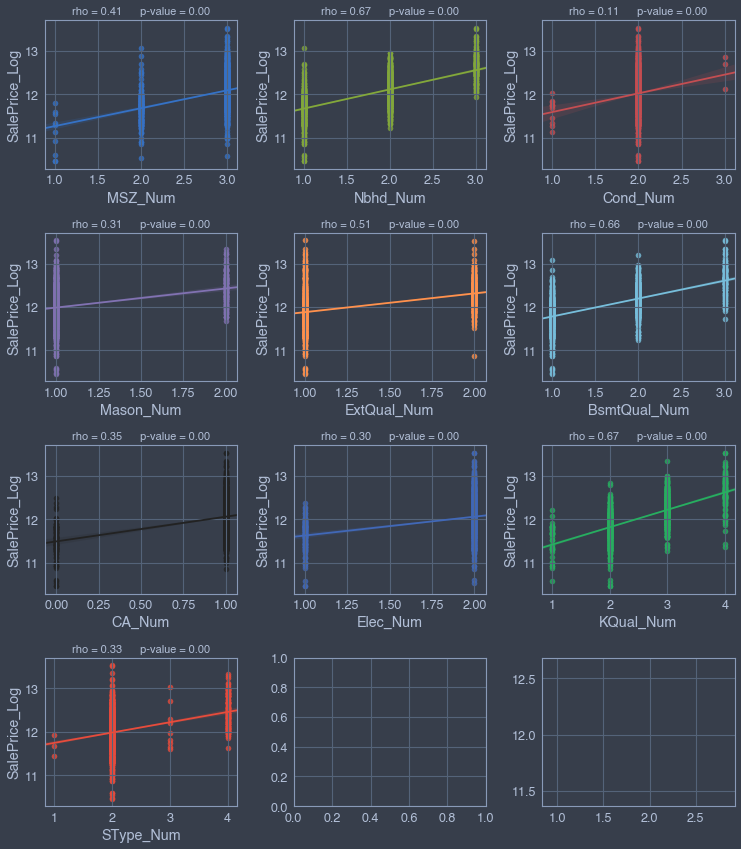

In [46]:
features_num_to_add = ['MSZ_Num', 'Nbhd_Num', 'Cond_Num', 'Mason_Num', 'ExtQual_Num', 'BsmtQual_Num', 'CA_Num', 'Elec_Num', 'KQual_Num', 'SType_Num']

n_rows = 4
n_cols = 3

target_ = target 

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        i = r*n_cols+c
        if i < len(list(features_num_to_add)):
            sns.regplot(df_train[features_num_to_add[i]], df_train[target_], ax = axs[r][c]) 
            stp = stats.pearsonr(df_train[features_num_to_add[i]], df_train[target_])
            str_title = "rho = " + "{0:.2f}".format(stp[0]) + "      " "p-value = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
         
plt.tight_layout()    
plt.show()   



In [47]:
#Columns to drop... .
c_drop = features_cat_hcorr + features_cat_lcorr
df_train.drop(c_drop, inplace= True, axis = 1)
df_test.drop(c_drop, inplace= True, axis = 1)


In [50]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log', 'MSZ_Num', 'Nbhd_Num',
       'Cond_Num', 'Mason_Num', 'ExtQual_Num', 'BsmtQual_Num', 'CA_Num',
       'Elec_Num', 'KQual_Num', 'SType_Num'],
      dtype='object')

# Outliers

In [51]:
for df in [df_train, df_test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)

#Remove Outliers

df_train = df_train.drop(
    df_train[(df_train['OverallQual']==10) & (df_train['SalePrice_Log']<12.3)].index)

df_train = df_train.drop(
    df_train[(df_train['GrLivArea_Log']>8.3) & (df_train['SalePrice_Log']<12.5)].index)

df_train.columns

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'SalePrice_Log', 'MSZ_Num', 'Nbhd_Num', 'Cond_Num', 'Mason_Num',
       'ExtQual_Num', 'BsmtQual_Num', 'CA_Num', 'Elec_Num', 'KQual_Num',
       'SType_Num', 'GrLivArea_Log', 'LotArea_Log'],
      dtype='object')

In [57]:
rho_thresh = 0.40
corr_abs = df_train.corr().abs().sort_values(by = target , ascending = False)[target]
features_num_above_rho_thresh = list(corr_abs[corr_abs.values > rho_thresh].index)
features_num_below_rho_thresh = list(corr_abs[corr_abs.values <= rho_thresh].index)
corr_abs 

SalePrice_Log    1.000000
SalePrice        0.948395
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
KQual_Num        0.669989
Nbhd_Num         0.668970
BsmtQual_Num     0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
ExtQual_Num      0.509939
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_Num          0.409423
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
CA_Num           0.351598
SType_Num        0.336567
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
Mason_Num        0.313280
Elec_Num         0.304857
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
Cond_Num         0.107610
PoolArea    

# Correlation Boundary Condition

We run the correlation and settle on the threshold 0.40 as the cutoff for inclusion in the regression.

In [61]:
# This section is set aside for possibly running alternates without messing up the current train/test sets.

from sklearn.linear_model import LinearRegression
 
df_train__ = df_train.copy()
df_test__ = df_test.copy()

c_nix = ['SalePrice_Log', 'SalePrice']
features = df_train.columns
features = [x for x in features if x not in c_nix]

rho_thresh = .40

corr_abs = df_train__.corr().abs().sort_values(by = target , ascending = False)[target]
features_num_above_rho_thresh = list(corr_abs[corr_abs.values > rho_thresh].index)
features_num_below_rho_thresh = list(corr_abs[corr_abs.values <= rho_thresh].index)

df_train__.drop(features_num_below_rho_thresh, inplace= True, axis = 1)    
df_test__.drop(features_num_below_rho_thresh, inplace= True, axis = 1)  


c_nix = ['SalePrice_Log', 'SalePrice']
features = df_train__.columns
features = [x for x in features if x not in c_nix]


Y_train =  df_train__['SalePrice_Log']
X_train = df_train__[features]

lm = LinearRegression()
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)


0.8887771646059609


# Multicollinearity

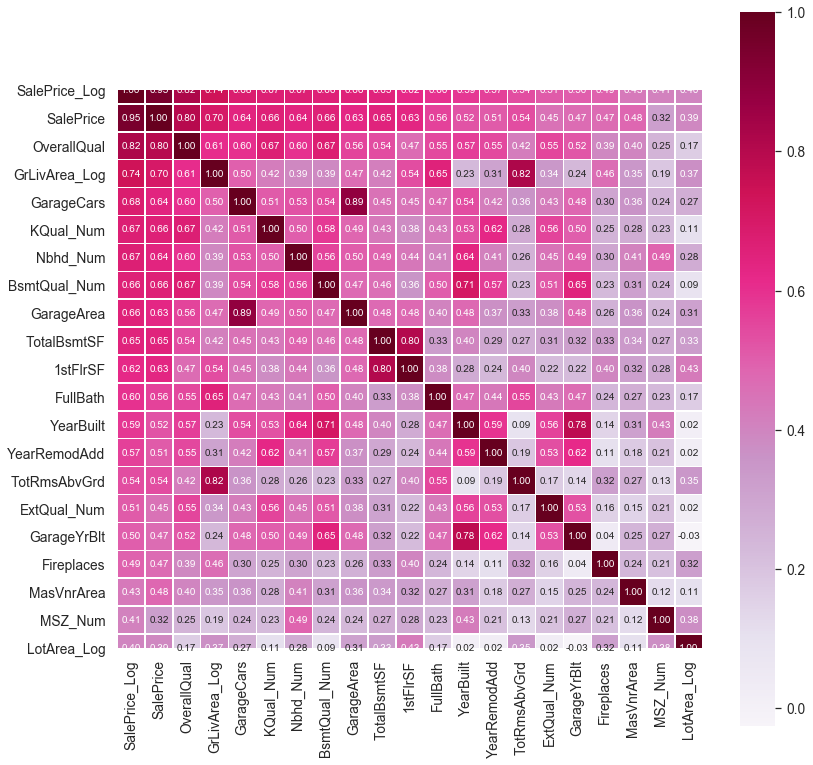

In [63]:
x = len(features_num_above_rho_thresh)
corr_matrix(df_train, x, target)

We see from the above chart that there is multicollinearity between the following and remove the one with the lower correlation to SalePrice_Log.

1.  'GrLivArea' and 'TotRmsAbvGrd'

2.  'GarageCars' and 'GarageArea'

3.  'TotalBsmtSF' and '1stFlrSF'

4.  'YearBuilt' and 'GarageYrBlt'



In [64]:
c_nix = ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt']
features = df_train__.columns
features = [x for x in features if x not in c_nix]

The dataframes are clean and ready to perform regression analysis.

In [76]:
df_train_clean = df_train__.to_csv('data/train_clean.csv')
df_test_clean = df_test__.to_csv('data/test_clean.csv')
df_features = pd.DataFrame(features)
df_features = df_features.to_csv('data/features.csv')

# Dummies (Not Used)

'''

all_data = pd.concat((df_train[features], df_test[features]))

get_dummies = ['OverallQual', 'Nbhd_Num', 'GarageCars','ExtQ_Num', 'KiQ_Num',
                  'BsQ_Num', 'FullBath', 'Fireplaces', 'MSZ_Num']
all_data = pd.get_dummies(all_data, columns=get_dummies, drop_first=True)

df_train_ml = all_data[:df_train.shape[0]]
df_test_ml  = all_data[df_train.shape[0]:]

'''

In [79]:
df_1 = pd.read_csv('data/train_clean.csv', index_col = 0)
df_2 = pd.read_csv('data/test_clean.csv', index_col = 0)
df_features = pd.read_csv('data/features.csv', index_col = 0)